In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


In [2]:
States_Data = pd.read_csv("States_Updated.csv")
States_df = pd.DataFrame(States_Data)
States_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200729,AK,3442.0,220222.0,NaN,45.0,NaN,NaN,NaN,3.0,...,223664,0,0,e3c05df1cf92b9c80941cec8daaf723905e7a0dd,0,0,0,0,0,NaN
1,20200729,AL,83782.0,584493.0,NaN,1598.0,9893.0,NaN,1109.0,NaN,...,668275,47,0,a7b049cfd14780e56e6ef98fb2aba9f82fe89838,0,0,0,0,0,NaN
2,20200729,AR,40968.0,454637.0,NaN,508.0,2747.0,NaN,NaN,108.0,...,495605,6,61,e1fad45c3dbf16efc7ddd84400b3629a9c824a71,0,0,0,0,0,NaN
3,20200729,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1037,0,0,62e46ea05669252eb426e2da4a1e822abcf86cb3,0,0,0,0,0,NaN
4,20200729,AZ,168273.0,733156.0,NaN,2424.0,10060.0,800.0,NaN,561.0,...,901429,46,666,9c7e10ce8b2fb77e7a69df1d09c60accaab1a498,0,0,0,0,0,NaN


In [3]:
States_New = States_df[["date","state","recovered","deathConfirmed","hospitalizedCumulative","positive"]]
States_New


,date,state,recovered,deathConfirmed,hospitalizedCumulative,positive
0,20200729,AK,854.0,22.0,NaN,3442.0
1,20200729,AL,32510.0,1489.0,9893.0,83782.0
2,20200729,AR,33938.0,NaN,2747.0,40968.0
3,20200729,AS,NaN,NaN,NaN,0.0
4,20200729,AZ,21994.0,2431.0,10060.0,168273.0
...,...,...,...,...,...,...
8188,20200126,WA,NaN,NaN,NaN,2.0
8189,20200125,WA,NaN,NaN,NaN,2.0
8190,20200124,WA,NaN,NaN,NaN,2.0
8191,20200123,WA,NaN,NaN,NaN,2.0


In [4]:
New = States_New.head(56)

In [5]:
New.fillna(0,inplace=True)     #Replacing NaN's with 0's

C:\Users\sunandan\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [6]:
New["Recovery Rate"] = ""
New["Death Rate"] = ""
New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    56 non-null     int64  
 1   state                   56 non-null     object 
 2   recovered               56 non-null     float64
 3   deathConfirmed          56 non-null     float64
 4   hospitalizedCumulative  56 non-null     float64
 5   positive                56 non-null     float64
 6   Recovery Rate           56 non-null     object 
 7   Death Rate              56 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 3.6+ KB


C:\Users\sunandan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sunandan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
for index,rows in New.iterrows():
    if rows["positive"]!= 0: 
        Per_Recovery = ((rows["recovered"]/rows["positive"])*100)
        Per_death=(rows["deathConfirmed"]/rows["positive"])*100
        New.loc[index,"Recovery Rate"] = Per_Recovery
        New.loc[index,"Death Rate"]=Per_death
    else :
        New.loc[index,"Recovery Rate"]=0
        New.loc[index,"Death Rate"]=0
        
        
New

C:\Users\sunandan\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,date,state,recovered,deathConfirmed,hospitalizedCumulative,positive,Recovery Rate,Death Rate
0,20200729,AK,854.0,22.0,0.0,3442.0,24.8112,0.639163
1,20200729,AL,32510.0,1489.0,9893.0,83782.0,38.8031,1.77723
2,20200729,AR,33938.0,0.0,2747.0,40968.0,82.8403,0
3,20200729,AS,0.0,0.0,0.0,0.0,0,0
4,20200729,AZ,21994.0,2431.0,10060.0,168273.0,13.0704,1.44468
5,20200729,CA,0.0,0.0,0.0,475305.0,0,0
6,20200729,CO,5243.0,0.0,6319.0,45314.0,11.5704,0
7,20200729,CT,8516.0,3544.0,10712.0,49540.0,17.1901,7.15382
8,20200729,DC,9723.0,0.0,0.0,11999.0,81.0318,0
9,20200729,DE,8108.0,511.0,0.0,14602.0,55.5266,3.49952


In [8]:
#Located the non-null rows
New_df = New.loc[New["recovered"]!=0]
New_df = New_df.loc[New_df["deathConfirmed"]!=0]
New_df.reset_index(inplace=True)
del New_df["index"]
New_df

,date,state,recovered,deathConfirmed,hospitalizedCumulative,positive,Recovery Rate,Death Rate
0,20200729,AK,854.0,22.0,0.0,3442.0,24.8112,0.639163
1,20200729,AL,32510.0,1489.0,9893.0,83782.0,38.8031,1.77723
2,20200729,AZ,21994.0,2431.0,10060.0,168273.0,13.0704,1.44468
3,20200729,CT,8516.0,3544.0,10712.0,49540.0,17.1901,7.15382
4,20200729,DE,8108.0,511.0,0.0,14602.0,55.5266,3.49952
5,20200729,ID,6203.0,139.0,783.0,19222.0,32.2703,0.72313
6,20200729,IN,45058.0,2733.0,8587.0,64299.0,70.0757,4.25045
7,20200729,KY,7495.0,720.0,3281.0,28727.0,26.0904,2.50635
8,20200729,LA,74246.0,3769.0,0.0,112773.0,65.8367,3.34211
9,20200729,MA,96452.0,8331.0,11855.0,116182.0,83.018,7.17065


In [9]:
y_axis = New_df["Death Rate"].sort_values(ascending = True)


The correlation between both factors is 0.67


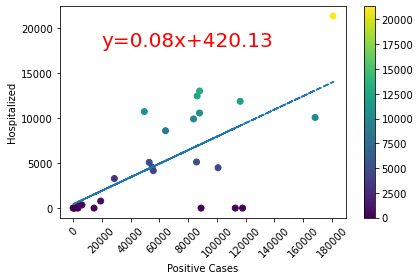

In [10]:
# This is the Scatter plot for Recovery rate vs. Positive cases
(slope,intercept,_,_,_)=linregress(x=New_df["positive"],y=New_df["hospitalizedCumulative"])
positive =New_df .iloc[:,5]
hos_cum=New_df.iloc[:,4]
fit=slope * positive +intercept

Recovery_plot= plt.scatter(New_df['positive'],New_df['hospitalizedCumulative'],c=New_df['hospitalizedCumulative'],cmap='viridis')
plt.xticks(np.arange(0,200000,20000),rotation=45)
plt.xlabel("Positive Cases")
plt.ylabel("Hospitalized")
plt.colorbar()
plt.tight_layout()

plt.plot(positive,fit,"--")
line_eq = "y=" +str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.annotate(line_eq,(20000,18000),fontsize=20,color="red")
plt.savefig("STATES DATA IMAGES/Scatter1.png")

cor_pos = New_df.iloc[:,5]
cor_hosp = New_df.iloc[:,4]

correlation = st.pearsonr(cor_pos, cor_hosp)
print(f"The correlation between both factors is {round(correlation[0],2)}")


### Analysis:
#### There is a little correlation between the hospitalized & positive cases.However,the data cannot be relied on totally.
#### Since there can be many hospitalizations that are not being reported.

The correlation between both factors is 0.7


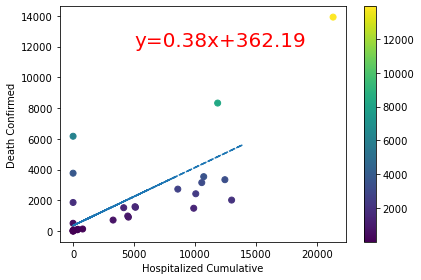

In [11]:
# This is the Scatter plot for Death rate vs. Hospita cases
#Death confirmed vs hospital for correlation
(slope,intercept,_,_,_)=linregress(x=New_df["hospitalizedCumulative"],y=New_df["deathConfirmed"])
dc =New_df .iloc[:,3]
hos_cum=New_df.iloc[:,4]
fit=slope * dc +intercept
dr_plot=plt.scatter(New_df['hospitalizedCumulative'],New_df['deathConfirmed'],c=New_df['deathConfirmed'],cmap='viridis')
#plt.yticks(np.arange(0, 80,10))
plt.xticks(np.arange(0,25000,5000))
plt.xlabel("Hospitalized Cumulative")
plt.ylabel("Death Confirmed")
plt.colorbar()
plt.tight_layout()

plt.plot(dc,fit,"--")
line_eq = "y=" +str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.annotate(line_eq,(5000,12000),fontsize=20,color="red")
plt.savefig("STATES DATA IMAGES/Scatter2.png")

cor_dc = New_df.iloc[:,3]
cor_hosp = New_df.iloc[:,4]


correlation2 = st.pearsonr(cor_dc, cor_hosp)
print(f"The correlation between both factors is {round(correlation2[0],2)}")

## Analysis:
##### Death confirmed and Hospitalized cumulative may or may not be related to each other.
###### All the death cases have not been reported from the hospitals because people with little symptoms are also dying because of it.So there are alot of death cases being reported from their home directly.This may be due to hospital expenses or non-avalabilty of  hospital beds in some regions.
##### Deaths with little symptoms may be due to low immunity,age group,hereditary diseases,the lifestyle or they can be region specific.

The correlation between both factors is 0.72


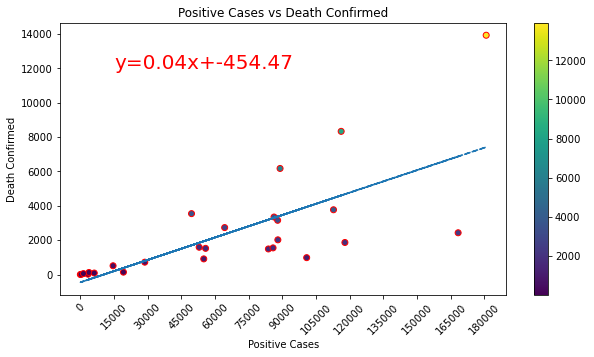

In [12]:
(slope,intercept,_,_,_)=linregress(x=New_df["positive"],y=New_df["deathConfirmed"])
positive =New_df .iloc[:,5]
dc=New_df.iloc[:,3]
fit=slope * positive +intercept


plt.figure(figsize=(10,5))
plt.scatter(New_df['positive'],New_df['deathConfirmed'],c=New_df["deathConfirmed"],edgecolors='r',cmap='viridis')
plt.title("Positive Cases vs Death Confirmed")
plt.xlabel("Positive Cases")
plt.ylabel("Death Confirmed")
plt.colorbar()
plt.xticks(np.arange(0,200000,15000),rotation=45)

plt.plot(positive,fit,"--")
line_eq = "y=" +str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.annotate(line_eq,(15000,12000),fontsize=20,color="red")
plt.savefig("STATES DATA IMAGES/Scatter3.png")

#plt.ylim(0,(y_axis.max()))
cor_dc = New_df.iloc[:,3]
cor_pos = New_df.iloc[:,5]
correlation3 = st.pearsonr(cor_dc, cor_pos)
print(f"The correlation between both factors is {round(correlation3[0],2)}")
plt.show()


## Analysis:
##### Here we see a coefficient of determination of value 51.84.
##### So the independent variable(Positive cases) can be accounted for 51% for the movement of dependent variable i.e.(Death Confirmed).
##### As the no.of positive cases rise it is not asssured that the no. of death cases will rise too.
##### There may be alot of factors for it too. One of them being immunity .

# Bar plots for the Top 5 states with highest recovery & highest death rates respectively:

In [13]:
New_df

,date,state,recovered,deathConfirmed,hospitalizedCumulative,positive,Recovery Rate,Death Rate
0,20200729,AK,854.0,22.0,0.0,3442.0,24.8112,0.639163
1,20200729,AL,32510.0,1489.0,9893.0,83782.0,38.8031,1.77723
2,20200729,AZ,21994.0,2431.0,10060.0,168273.0,13.0704,1.44468
3,20200729,CT,8516.0,3544.0,10712.0,49540.0,17.1901,7.15382
4,20200729,DE,8108.0,511.0,0.0,14602.0,55.5266,3.49952
5,20200729,ID,6203.0,139.0,783.0,19222.0,32.2703,0.72313
6,20200729,IN,45058.0,2733.0,8587.0,64299.0,70.0757,4.25045
7,20200729,KY,7495.0,720.0,3281.0,28727.0,26.0904,2.50635
8,20200729,LA,74246.0,3769.0,0.0,112773.0,65.8367,3.34211
9,20200729,MA,96452.0,8331.0,11855.0,116182.0,83.018,7.17065


In [14]:
# Sorted the data frame in descending order of Death Rates and picked up the Top 5 values.....
Sort_Death = New_df.sort_values("Death Rate",ascending = False)
Death_df = Sort_Death.head(5)
Death_df.sort_values("Death Rate",ascending=True,inplace=True)
Death_df.reset_index(inplace=True)
del Death_df["index"]


C:\Users\sunandan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
Death_df

,date,state,recovered,deathConfirmed,hospitalizedCumulative,positive,Recovery Rate,Death Rate
0,20200729,MP,29.0,2.0,4.0,40.0,72.5,5
1,20200729,MI,57502.0,6172.0,0.0,88974.0,64.6279,6.93686
2,20200729,CT,8516.0,3544.0,10712.0,49540.0,17.1901,7.15382
3,20200729,MA,96452.0,8331.0,11855.0,116182.0,83.018,7.17065
4,20200729,NJ,32365.0,13923.0,21321.0,180766.0,17.9044,7.70222


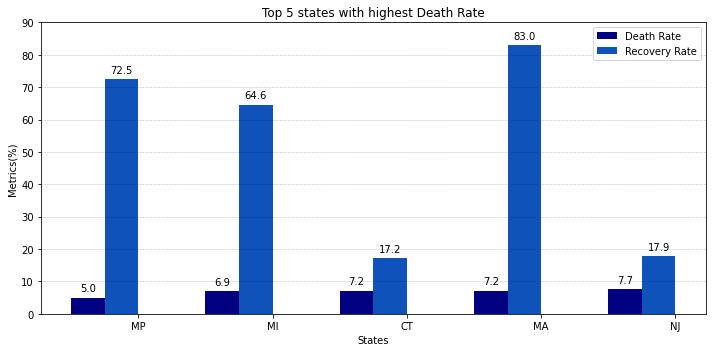

In [24]:
length = len(Death_df)
x_labels = list(Death_df['state'])

# Set plot parameters
fig, ax = plt.subplots(figsize=(10,5))
width = 0.25 # width of bar
x = np.arange(length)
ax.bar(x, Death_df["Death Rate"], width, color='#000080', label='Death Rate')
ax.bar(x + width, Death_df["Recovery Rate"], width, color='#0F52BA', label='Recovery Rate')

#Annotating the percentage values above each bar!!!!!!!!!!!!!!!!

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set_ylabel('Metrics(%)')
ax.set_ylim(0,90)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('States')
ax.set_title('Top 5 states with highest Death Rate')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
fig.tight_layout()

plt.savefig("STATES DATA IMAGES/Top_Death_Chart.png")
plt.show()


### Analysis:
##### We have done this analysis to show the states which have the alarming death rates and which needs more of attention.
##### This can be important Nationwide in order to take necessary measures to control the current conditions which are leading to higher death rates.

In [17]:
x_labels = list(Death_df['state'])
x_labels

['MP', 'MI', 'CT', 'MA', 'NJ']

In [18]:
# Sorted the data frame in descending order of Recovery Rates and picked up the Top 5 values.....
Recovery_sort = New_df.sort_values("Recovery Rate",ascending = False)
Top_recovery = Recovery_sort.head(5)
Top_recovery.reset_index(inplace=True)
del Top_recovery["index"]
Top_recovery

,date,state,recovered,deathConfirmed,hospitalizedCumulative,positive,Recovery Rate,Death Rate
0,20200729,MN,46636.0,1589.0,5077.0,52947.0,88.0805,3.00111
1,20200729,ME,3336.0,120.0,385.0,3866.0,86.2907,3.10398
2,20200729,VT,1199.0,56.0,0.0,1406.0,85.2774,3.98293
3,20200729,MA,96452.0,8331.0,11855.0,116182.0,83.018,7.17065
4,20200729,ND,5087.0,88.0,351.0,6227.0,81.6926,1.4132


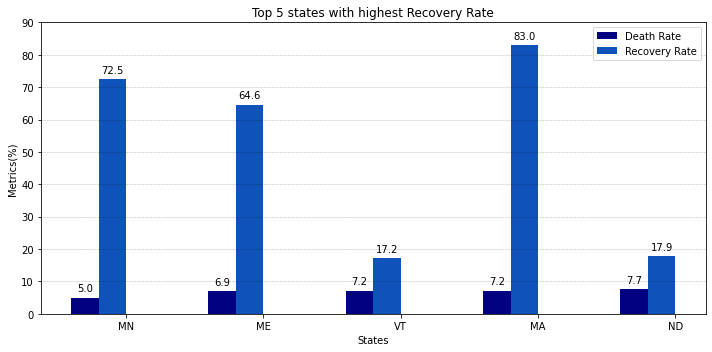

In [23]:
length = len(Top_recovery)
x_labels = list(Top_recovery['state'])

# Set plot parameters
fig, ax = plt.subplots(figsize=(10,5))
width = 0.2 # width of bar
x = np.arange(length)
ax.bar(x, Death_df["Death Rate"], width, color='#000080', label='Death Rate')
ax.bar(x + width, Death_df["Recovery Rate"], width, color='#0F52BA', label='Recovery Rate')

#Annotating the percentage values above each bar!!!!!!!!!!!!!!!!

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set_ylabel('Metrics(%)')
ax.set_ylim(0,90)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('States')
ax.set_title('Top 5 states with highest Recovery Rate')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()

plt.savefig("STATES DATA IMAGES/Top_Recovery_Chart.png")
plt.show()


## Analysis:
##### Finding the States with Top 5 recovery was an important part of our analysis in order to
##### find out how these states are doing better as compared to the other ones.
##### And what measures they are taking to have a control of the situation among this pandemic.
##### A detailed research can be carried out on these states to determine the factors to improve the situation.

In [20]:
#Concatenated states with top death and top recovery rates.
frame=[Top_recovery,Death_df]
Merged_df=pd.concat(frame)
Final_df=Merged_df.drop_duplicates().reset_index()
del Final_df['index']
Final_df

,date,state,recovered,deathConfirmed,hospitalizedCumulative,positive,Recovery Rate,Death Rate
0,20200729,MN,46636.0,1589.0,5077.0,52947.0,88.0805,3.00111
1,20200729,ME,3336.0,120.0,385.0,3866.0,86.2907,3.10398
2,20200729,VT,1199.0,56.0,0.0,1406.0,85.2774,3.98293
3,20200729,MA,96452.0,8331.0,11855.0,116182.0,83.018,7.17065
4,20200729,ND,5087.0,88.0,351.0,6227.0,81.6926,1.4132
5,20200729,MP,29.0,2.0,4.0,40.0,72.5,5
6,20200729,MI,57502.0,6172.0,0.0,88974.0,64.6279,6.93686
7,20200729,CT,8516.0,3544.0,10712.0,49540.0,17.1901,7.15382
8,20200729,NJ,32365.0,13923.0,21321.0,180766.0,17.9044,7.70222


The correlation between both factors is -0.71


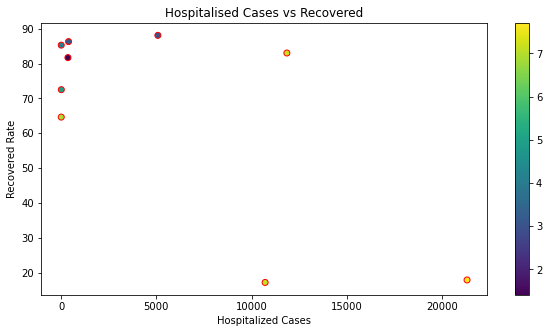

In [22]:

plt.figure(figsize=(10,5))
plt.scatter(Final_df['hospitalizedCumulative'],Final_df['Recovery Rate'],c=Final_df['Death Rate'],edgecolors='r',cmap='viridis')
plt.title("Hospitalised Cases vs Recovered")
plt.xlabel("Hospitalized Cases")
plt.ylabel("Recovered Rate")
plt.colorbar()
plt.xticks(np.arange(0,25000,5000))

cor_hc = Final_df.iloc[:,4]
cor_rec = Final_df.iloc[:,6]
correlation4 = st.pearsonr(cor_hc, cor_rec)
print(f"The correlation between both factors is {round(correlation4[0],2)}")

plt.savefig("STATES DATA IMAGES/scatter4.png")
plt.show()

## Analysis:
##### This Scatter Plot shows that there may be almost no or negative correlation between the Hospitalization & Recovery Rate.
##### People are recovering without getting hospitalized in some cases.
##### This can be due to the reason that most of the people have different level of immunity to fight against it and they don't face much health issues and the symptoms are mostly like a normal flu and less fatal.
##### Another factor can be people are taking measures at home to control it and isolating themselves at an early stage .